<a href="https://colab.research.google.com/github/Gogeta-dbs/Amazon-Sales-Report/blob/main/Amazon_sales_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   index             Order ID       Date  Month     Weeks  \
0      0  405-8078784-5731545  4/30/2022  April  Saturday   
1      1  171-9198151-1101146  4/30/2022  April  Saturday   
2      2  404-0687676-7273146  4/30/2022  April  Saturday   
3      3  403-9615377-8133951  4/30/2022  April  Saturday   
4      4  407-1069790-7240320  4/30/2022  April  Saturday   

                         Status Fulfilment Sales Channel ship-service-level  \
0                     Cancelled   Merchant     Amazon.in           Standard   
1  Shipped - Delivered to Buyer   Merchant     Amazon.in           Standard   
2                       Shipped     Amazon     Amazon.in          Expedited   
3                     Cancelled   Merchant     Amazon.in           Standard   
4                       Shipped     Amazon     Amazon.in          Expedited   

   Category  ... Courier Status Qty  currency  Amount    ship-city  \
0   T-shirt  ...     On the Way   0       INR  647.62       MUMBAI   
1     Shirt  ...  

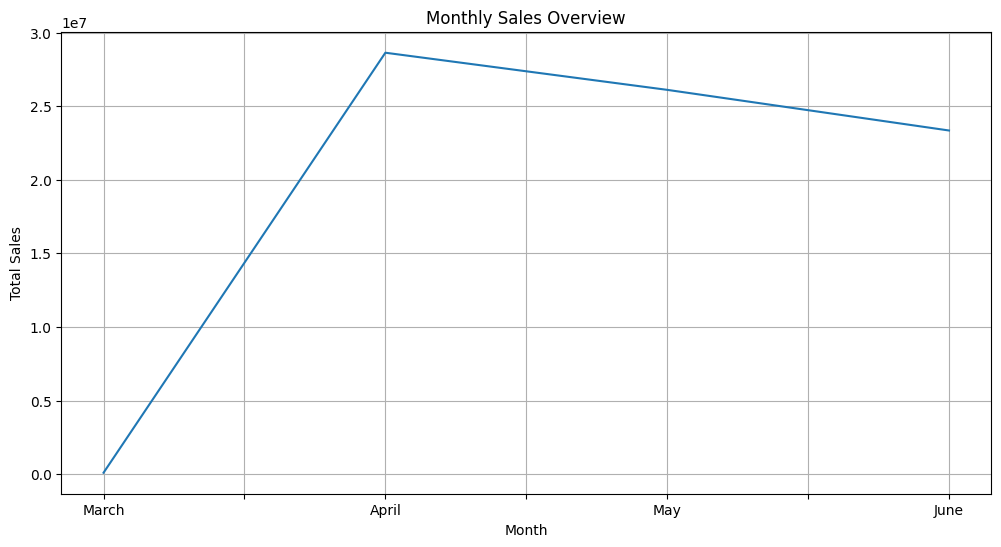

Weeks
Friday       10745150.26
Monday       11279219.51
Saturday     11279327.90
Sunday       11983539.39
Thursday     10311261.22
Tuesday      11388563.92
Wednesday    11192741.68
Name: Amount, dtype: float64


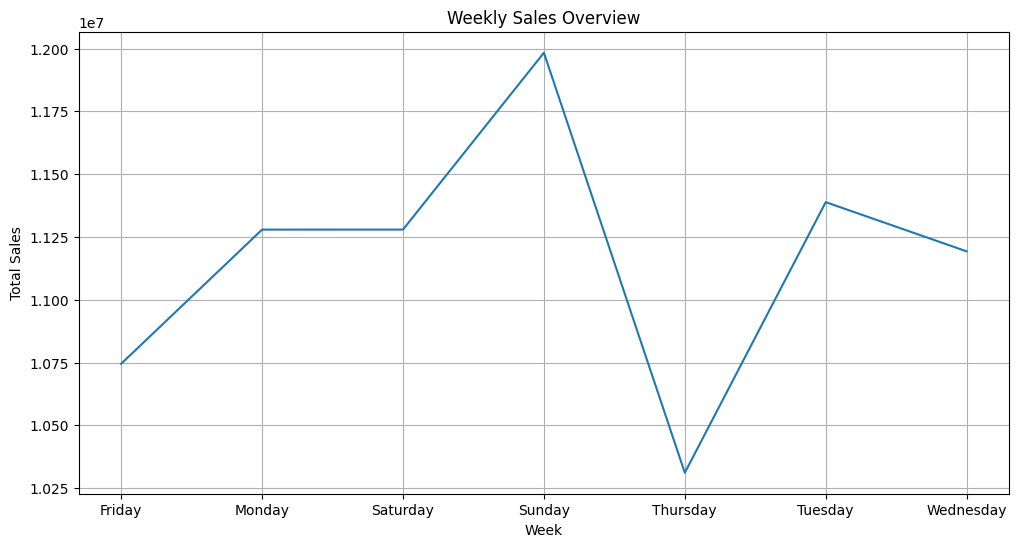

Category
T-shirt     39074570.36
Shirt       21127971.29
Blazzer     11141538.83
Trousers     5328406.30
Perfume       787818.66
Name: Amount, dtype: float64


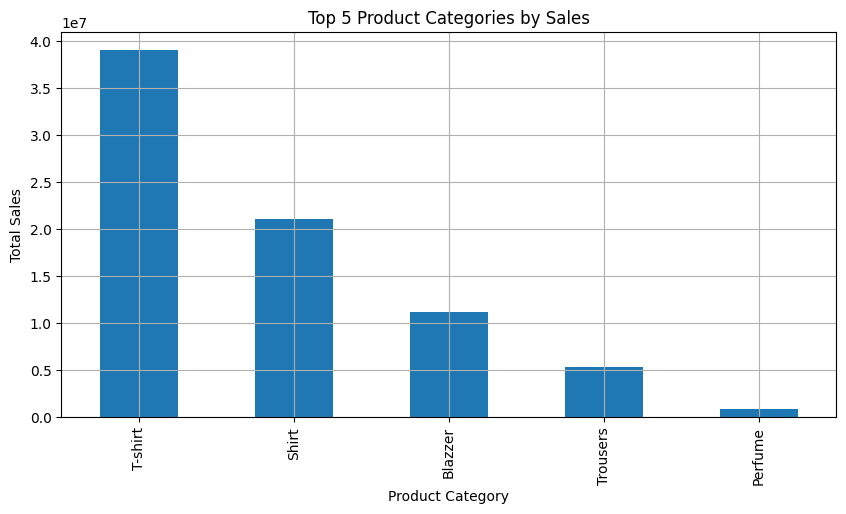

Size
M      13629948.32
L      12968681.45
XL     12181655.71
XXL    10412257.10
S      10391969.70
Name: Amount, dtype: float64


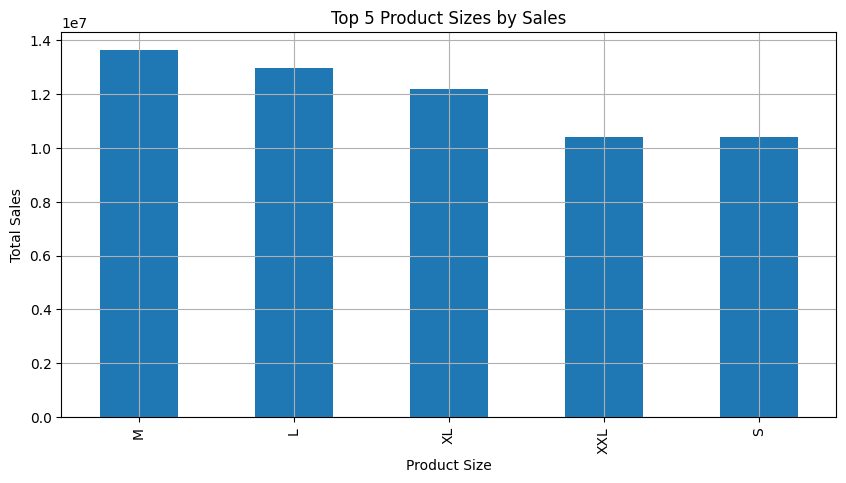

Fulfilment
Amazon      89085
Merchant    38932
Name: count, dtype: int64


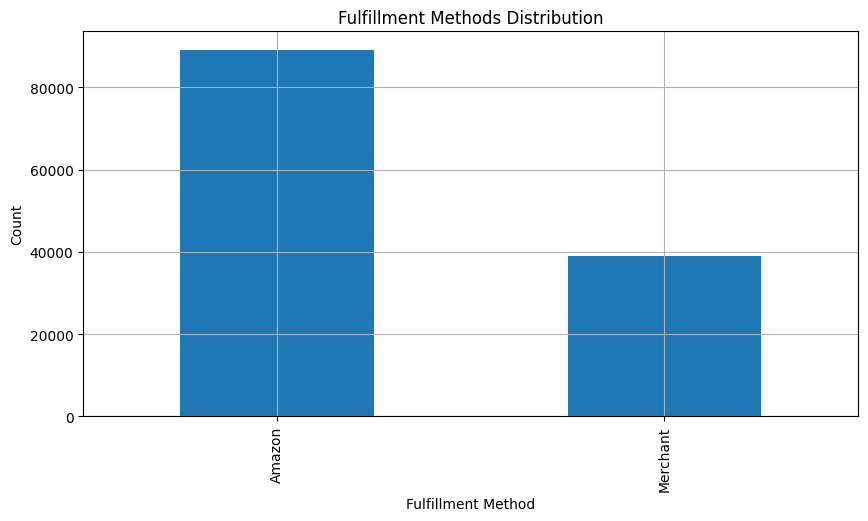

Order ID
408-3363121-6123562    8636.0
405-8750647-4224357    8081.0
403-4288285-8521928    6993.0
404-9932919-6662730    6832.0
408-3317403-1729937    6680.0
Name: Amount, dtype: float64


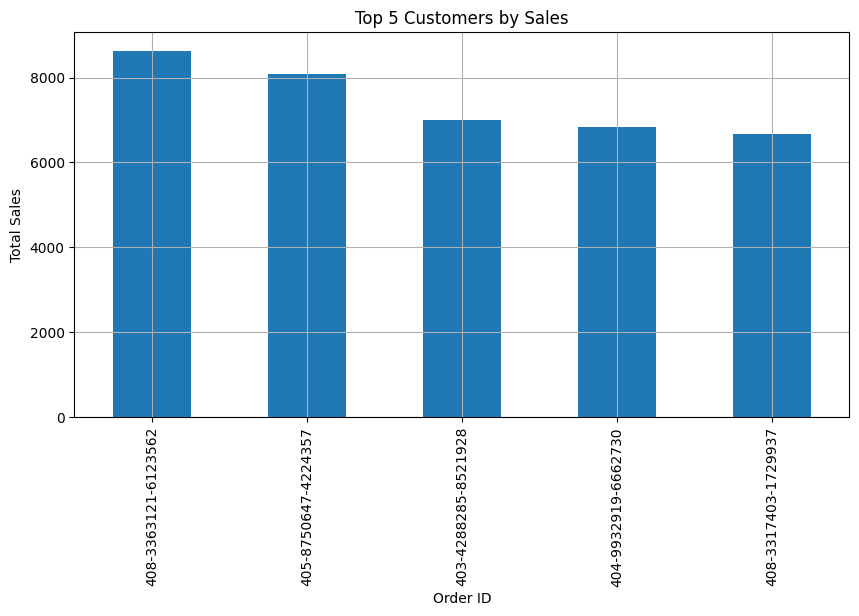

ship-state
MAHARASHTRA      13261933.90
KARNATAKA        10421496.02
TELANGANA         6880035.27
UTTAR PRADESH     6798644.08
TAMIL NADU        6477109.53
Name: Amount, dtype: float64
ship-city
BENGALURU    6806039.31
HYDERABAD    4923424.25
MUMBAI       3677250.37
NEW DELHI    3596827.78
CHENNAI      3085104.93
Name: Amount, dtype: float64


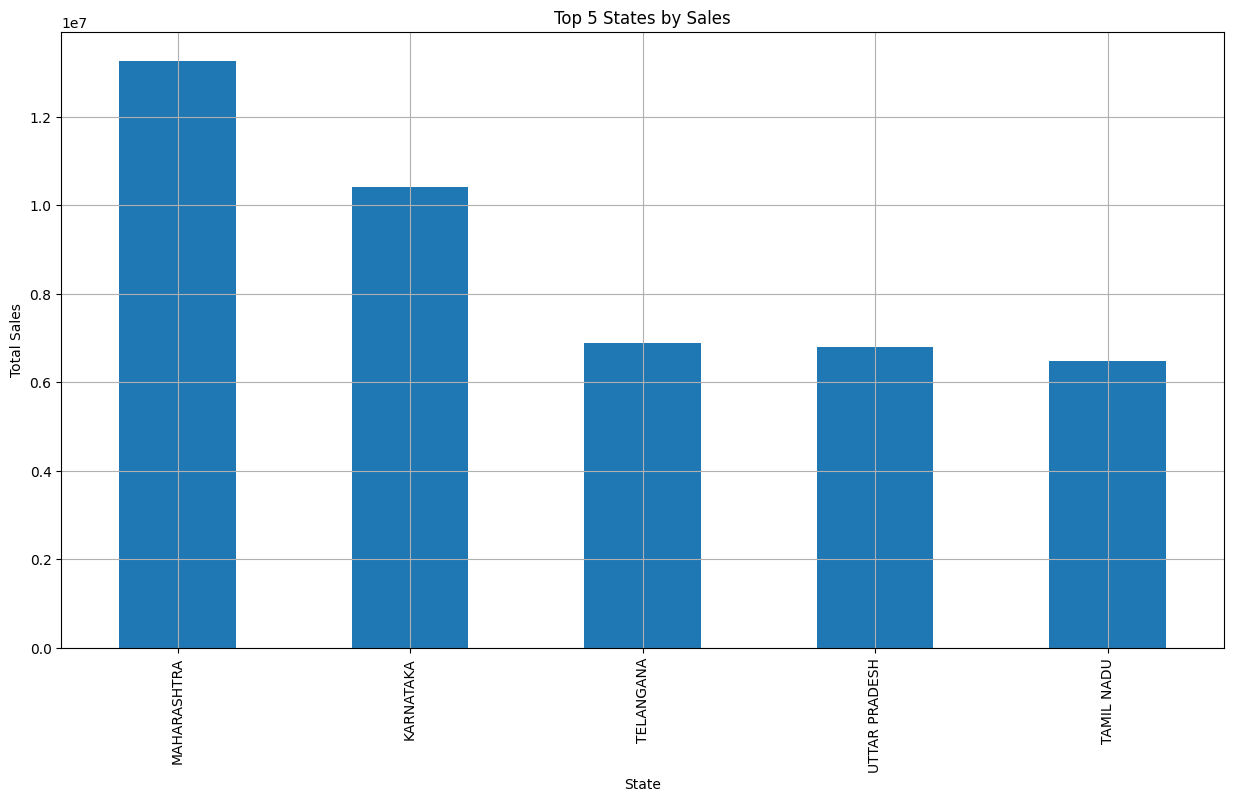

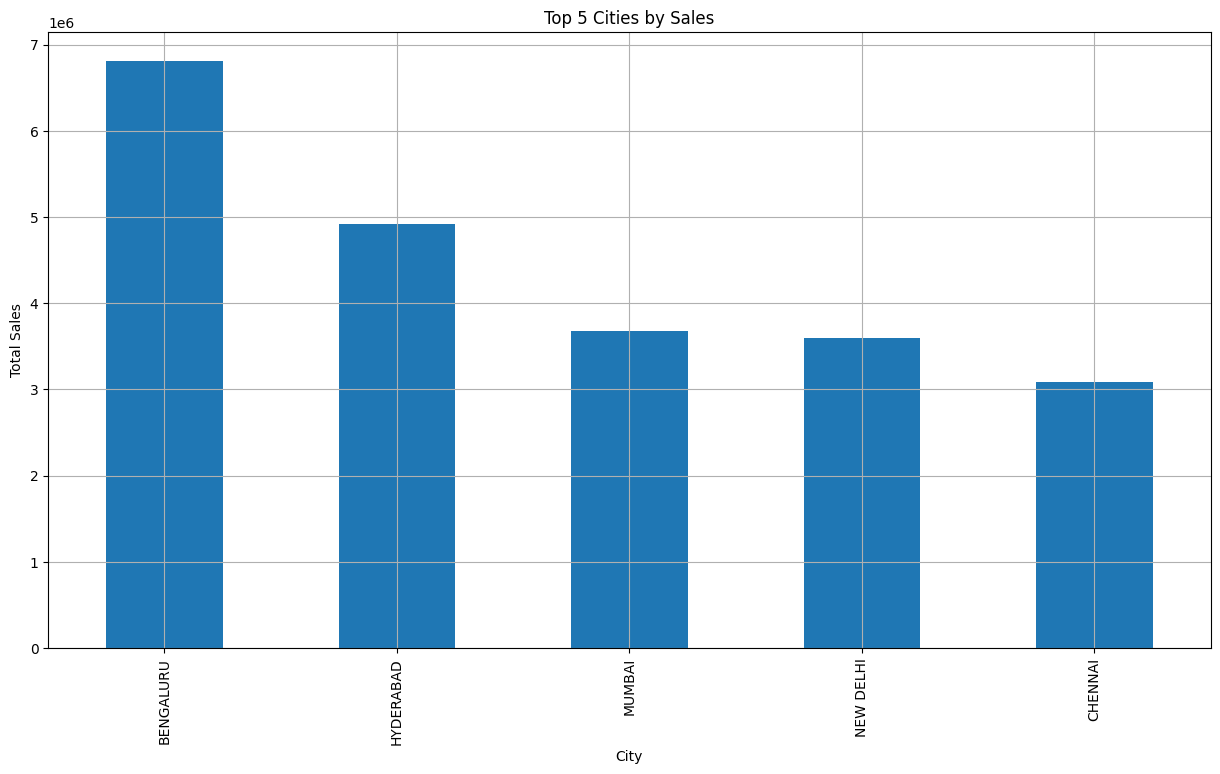

Courier Status
Shipped       85.012147
On the Way     5.311013
Unshipped      5.189936
Cancelled      4.486904
Name: proportion, dtype: float64


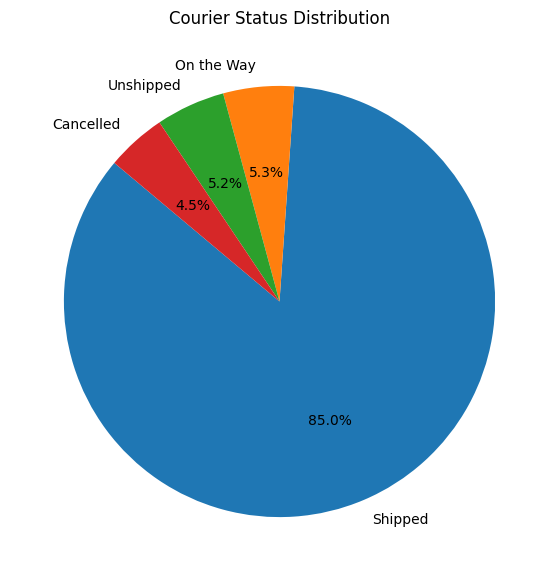

Analysis report saved successfully.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset
file_path = '/content/amazon sales analysis  final report.xlsx - Amazon Sale Report (1) (1).csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Convert 'Amount' column to numeric, forcing errors to NaN, and drop rows with NaN
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df = df.dropna(subset=['Amount'])

# 1. Sales Overview
# Monthly sales overview
# Define the correct order for the months
month_order = ["March", "April", "May", "June"]

df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
monthly_sales = df.groupby('Month')['Amount'].sum().reindex(month_order)
print(monthly_sales)

# Plot monthly sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Overview')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Weekly sales overview
weekly_sales = df.groupby('Weeks')['Amount'].sum()
print(weekly_sales)

# Plot weekly sales
plt.figure(figsize=(12, 6))
weekly_sales.plot(kind='line')
plt.title('Weekly Sales Overview')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# 2. Product Analysis
# Top 5 product categories
top_categories = df.groupby('Category')['Amount'].sum().nlargest(5)
print(top_categories)

# Plot top 5 product categories
plt.figure(figsize=(10, 5))
top_categories.plot(kind='bar')
plt.title('Top 5 Product Categories by Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Top 5 product sizes
top_sizes = df.groupby('Size')['Amount'].sum().nlargest(5)
print(top_sizes)

# Plot top 5 product sizes
plt.figure(figsize=(10, 5))
top_sizes.plot(kind='bar')
plt.title('Top 5 Product Sizes by Sales')
plt.xlabel('Product Size')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# 3. Fulfillment Analysis
# Fulfillment methods analysis
fulfillment_methods = df['Fulfilment'].value_counts()
print(fulfillment_methods)

# Plot fulfillment methods
plt.figure(figsize=(10, 5))
fulfillment_methods.plot(kind='bar')
plt.title('Fulfillment Methods Distribution')
plt.xlabel('Fulfillment Method')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# 4. Customer Segmentation
# Top 5 customers
top_customers = df.groupby('Order ID')['Amount'].sum().nlargest(5)
print(top_customers)

# Plot top 5 customers
plt.figure(figsize=(10, 5))
top_customers.plot(kind='bar')
plt.title('Top 5 Customers by Sales')
plt.xlabel('Order ID')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# 5. Geographical Analysis
# Top 5 states
top_states = df.groupby('ship-state')['Amount'].sum().nlargest(5)
print(top_states)

# Top 5 cities
top_cities = df.groupby('ship-city')['Amount'].sum().nlargest(5)
print(top_cities)

# Plot geographical distribution
plt.figure(figsize=(15, 8))
top_states.plot(kind='bar')
plt.title('Top 5 States by Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 8))
top_cities.plot(kind='bar')
plt.title('Top 5 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# 6. Courier Status Analysis
# Courier status analysis
courier_status = df['Courier Status'].value_counts(normalize=True) * 100
print(courier_status)

# Plot courier status as a pie chart
plt.figure(figsize=(10, 7))
courier_status.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Courier Status Distribution')
plt.ylabel('')
plt.show()

# Save the comprehensive report
output_directory = '/content/analysis_reports'
os.makedirs(output_directory, exist_ok=True)
output_path = os.path.join(output_directory, 'amazon_sales_analysis_report.xlsx')
with pd.ExcelWriter(output_path) as writer:
    monthly_sales.to_frame('Monthly Sales').to_excel(writer, sheet_name='Monthly Sales')
    weekly_sales.to_frame('Weekly Sales').to_excel(writer, sheet_name='Weekly Sales')
    top_categories.to_frame('Top Categories').to_excel(writer, sheet_name='Top Categories')
    top_sizes.to_frame('Top Sizes').to_excel(writer, sheet_name='Top Sizes')
    fulfillment_methods.to_frame('Fulfillment Methods').to_excel(writer, sheet_name='Fulfillment Methods')
    top_customers.to_frame('Top Customers').to_excel(writer, sheet_name='Top Customers')
    top_states.to_frame('Top States').to_excel(writer, sheet_name='Top States')
    top_cities.to_frame('Top Cities').to_excel(writer, sheet_name='Top Cities')
    courier_status.to_frame('Courier Status').to_excel(writer, sheet_name='Courier Status')

print("Analysis report saved successfully.")
